In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

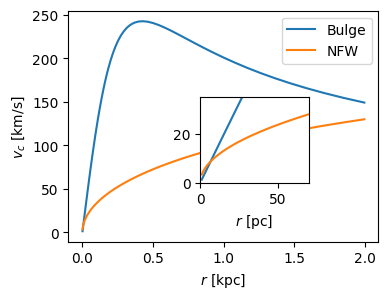

In [5]:
def velocity_c(r):
    """
    Calculate the circular velocity for a given radius (r) in pc resulting from the galactic bulge.
    """

    G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2
    M_bulge = 1.067e10  # Mass of the bulge in M_sun
    M_sun = 1.989e30
    r_b = 0.3e3  # Scale radius in parsecs

    # Converting r to meters
    r = r * 3.086e16
    r_b = r_b * 3.086e16

    # Converting M_bulge to kg
    M_bulge = M_bulge * M_sun
    
    return np.sqrt((G * M_bulge * r**2) / (r**2 + r_b**2)**(3/2))

def velocity_c_NFW(r):
    """
    Calculate the circular velocity for a given radius (r) in pc using the NFW profile.
    """
   
    r = r * 3.086e16
    G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2
    M_sun = 1.989e30
    rho_0 = 0.052 * M_sun / (3.086e16)**3  # Characteristic density in SI units
    r_s = 8.1*1e3 * 3.086e16      # Scale radius in pc
    
    term1 = r_s / (r_s + r)
    term2 = np.log( (r_s + r) / r_s)
    v_c = np.sqrt(4 * np.pi * G * rho_0 * (r_s**3 / r) * (term1 + term2 - 1))
    return v_c


# Generate an array of radius values from 0 to 500 parsecs
r_values = np.logspace(0, 3.3, 100)
# Plotting
fig, ax = plt.subplots(figsize=(4, 3))

v_values = velocity_c(r_values)
ax.plot(r_values/1e3, v_values / 1e3, label='Bulge', color = colors[0])

# Adding an inset plot
ax_inset = inset_axes(ax, width="35%", height="37%", loc='center', bbox_to_anchor=(0.1, -0.06, 1, 1), bbox_transform=ax.transAxes)
ax_inset.plot(r_values, v_values / 1e3, color = colors[0])
ax_inset.set_xlim(0, 70)  # Zoom in on the inner 50 parsecs
ax_inset.set_ylim(0, 35)  # Adjust the y-axis range if needed


r_values = np.logspace(0, 3.3, 100)
v_values = velocity_c_NFW(r_values)
ax.plot(r_values/1e3, v_values /1e3, label='NFW', color = colors[1]) 
            
# Adding an inset plot
# ax_inset = inset_axes(ax, width="35%", height="37%", loc='center', bbox_to_anchor=(-0.05, -0.08, 1, 1), bbox_transform=ax.transAxes)
ax_inset.plot(r_values, v_values / 1e3, color = colors[1])
ax_inset.set_xlim(0, 70)  # Zoom in on the inner 50 parsecs
ax_inset.set_ylim(0, 35)  # Adjust the y-axis range if needed
ax_inset.set_xlabel('$r$ [pc]')
# ax_inset.set_ylabel('$v_c$')
# ax_inset.grid(True)

ax.set_xlabel('$r$ [kpc]')
ax.set_ylabel('$v_c$ [km/s]')
ax.legend(loc = 'upper right')
# # ax.grid(True)

plt.savefig('rotation_curve', dpi = 200, bbox_inches='tight')